# Lecture 2 -  Key datatypes & operators in R

### Lecture learning objectives:

By the end of this lecture and worksheet 2, students should be able to:

* Explain how the assignment symbol, `<-` differs from `=` in R
*  Create in R, and define and differentiate in English, the below listed key datatypes in R:
	- logical, numeric, character and factor vectors
	- lists
	- data frames and tibbles
* Use R to determine the type and structure of an object
* Explain the distinction between names and values, and when R will copy an object.
* Use the three subsetting operators, `[[`, `[`, and `$`, to subset single and multiple elements from vectors and data frames, lists and matrices
* Compute numeric and boolean values using their respective types and operations

### Getting help in R

No one, even experienced, professional programmers remember what every function does, nor do they remember every possible function argument/option. So both experienced and new programmers (like you!) need to look things up, A LOT! 

One of the most efficient places to look for help on how a function works is the R help files. Let’s say we wanted to pull up the help file for the `max()` function. We can do this by typing a question mark in front of the function we want to know more about. 

`?max`

At the very top of the file, you will see the function itself and the package it is in (in this case, it is base). Next is a description of what the function does. You’ll find that the most helpful sections on this page are “Usage”, “Arguments” and "Examples". 

- **Usage** gives you an idea of how you would use the function when coding--what the syntax would be and how the function itself is structured. 
- **Arguments** tells you the different parts that can be added to the function to make it more simple or more complicated. Often the “Usage” and “Arguments” sections don’t provide you with step by step instructions, because there are so many different ways that a person can incorporate a function into their code. Instead, they provide users with a general understanding as to what the function could do and parts that could be added. At the end of the day, the user must interpret the help file and figure out how best to use the functions and which parts are most important to include for their particular task. 
- The **Examples** section is often the most useful part of the help file as it shows how a function could be used with real data. It provides a skeleton code that the users can work off of.

Below is a useful graphical summary of the help docs that might be useful to start getting you oriented to them:

<img src="https://socviz.co/assets/ch-09-read-a-help-page.png">

*Source: https://socviz.co/appendix.html#a-little-more-about-r*

### The assignment symbol, `<-`

- R came from S, S used `<-`
- S was inspired from APL, which also used `<-`
- APL was designed on a specific keyboard, which had a key for `<-`
- At that time there was no `==` for testing equality, it was tested with `=`, so something else need to be used for assignment.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/APL-keybd2.svg/410px-APL-keybd2.svg.png">

source: https://colinfay.me/r-assignment/

- Nowadays, `=` can also be used for assignment, however there are some things to be aware of...

- stylistically, `<-` is preferred over `=` for readability

- `<-` and `->` are valid in R, the latter can be useful in pipelines (more on this in data wrangling)

- `<-` and `=` have different emphasis in regards to environments

- **we expect you to use `<-` in MDS for object assignment in R** 

#### Assignment readability

Consider this code:

```
c <- 12
d <- 13
```

Which equality is easier to read? 

```
e = c == d
```

or

```
e <- c == d
```

#### Assignment environment

What value does x hold at the end of each of these code chunks?



```median(x = 1:10)```

vs

```median(x <- 1:10)```

Here, in the first example where `=` is used to set `x`, `x` only exists in the `median` function call, so we are returned the result from that function call, however, when we call `x` later, it does not exist and so R returns an error.

```
median(x = 1:10)
x
```

```
5.5
Error in eval(expr, envir, enclos): object 'x' not found
Traceback:
```

Here, in the second example where `<-` is used to set `x`, `x` exists in the median function call, **and** in the global environment (outside the `median` function call). So when we call `x` later, it **does** exist and so R returns the value that the name `x` is bound to.

```
median(x <- 1:10)
x
```


```
5.5
1 2 3 4 5 6 7 8 9 10
```

#### What does assignment do in R?

When you type this into R: `x <- c(1, 2, 3)`

This is what R does: 

<img src="https://d33wubrfki0l68.cloudfront.net/bd90c87ac98708b1731c92900f2f53ec6a71edaf/ce375/diagrams/name-value/binding-1.png" width=300 algin="left">

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

What does this mean? It means that even if you don't bind a name to an object in R using ` <- `, it still exists somewhere in memory during the R session it was created in. This is typically not a problem unless your data sets are very large.

### A note on names

#### Rules for syntactic names:
- May use: letters, digits, `.` and `_`
- Cannot begin with `_` or a digit
- Cannot use reserved words (e.g., `for`, `if`, `return`)

#### How to manage non-syntactic names
- Usually come across these when reading in someone else's data
- Backticks, \`, can be used manage these cases (e.g., ``` `_abc` <- 1 ```)
- If your data contains these, use R to rename things to make them syntactic (for your future sanity)

### Key datatypes in R

<img src="img/r-datatypes.png" width=1000>

*note - There are no scalars in R, they are represented by vectors of length 1.*

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

- `NULL` is not a vector, but related and frequently functions in the role of a generic zero length vector.

#### What is a data frame?

From a data perspective, it is a rectangle where the rows are the observations:

<img src="https://github.com/UBC-DSCI/introduction-to-datascience/blob/master/img/obs.jpeg?raw=true" width=800>

#### What is a data frame?

and the columns are the variables:

<img src="https://github.com/UBC-DSCI/introduction-to-datascience/blob/master/img/vars.jpeg?raw=true" width=800>

#### What is a data frame? 

From a computer programming perspective, in R, a data frame is a special subtype of a list object whose elements (columns) are vectors.

<img src="https://github.com/UBC-DSCI/introduction-to-datascience/blob/master/img/vectors.jpeg?raw=true" width=800>

**Question:** What do you notice about the elements of each of the vectors in this data frame?

#### What is a vector?

- objects that can contain 1 or more elements
- elements are ordered
- must all be of the same type (e.g., double, integer, character, logical)

<img src="https://github.com/UBC-DSCI/introduction-to-datascience/blob/master/img/vector.jpeg?raw=true" width=800>

#### How are vectors different from a list?
<img src="https://github.com/UBC-DSCI/introduction-to-datascience/blob/master/img/vec_vs_list.jpeg?raw=true" width=800>

#### Reminder: what do lists have to do with data frames?

<img src="https://github.com/UBC-DSCI/introduction-to-datascience/blob/master/img/dataframe.jpeg?raw=true" width=800>

### A bit more about Vectors

Your closest and most important friend in R

<img src="https://media.giphy.com/media/EQCgmS4lwDS8g/giphy.gif" width=800>

#### Creating vectors and vector types

In [28]:
char_vec <- c("joy", "peace", "help", "fun", "sharing")
char_vec
typeof(char_vec)

[1] "joy"     "peace"   "help"    "fun"     "sharing"

[1] "character"

In [29]:
log_vec <- c(TRUE, TRUE, FALSE, FALSE, TRUE)
log_vec
typeof(log_vec)

[1]  TRUE  TRUE FALSE FALSE  TRUE

[1] "logical"

In [30]:
double_vec <- c(1, 2, 3, 4, 5)
double_vec
typeof(double_vec)

[1] 1 2 3 4 5

[1] "double"

In [31]:
int_vec <- c(1L, 2L, 3L, 4L, 5L)
int_vec
typeof(int_vec)

[1] 1 2 3 4 5

[1] "integer"

`str` is a useful command to get even more information about an object:

In [32]:
str(int_vec)

 int [1:5] 1 2 3 4 5


#### What happens to vectors of mixed type?



In [33]:
mixed_vec <- c("joy", 5.6, TRUE, 1L, "sharing")
typeof(mixed_vec)

[1] "character"

Hierarchy for coercion:

character → double → integer → logical

#### Useful functions for testing type and forcing coercion:

- `is.logical()`, `is.integer()`, `is.double()`, and `is.character()` returns `TRUE` or `FALSE`, depending on type of object and function used.
- `as.logical()`, `as.integer()`,` as.double()`, or `as.character()` coerce vector to type specified by function name. 

#### How to subset and modify vectors

<img src="https://media.giphy.com/media/l4pTocra1lFDomV5S/giphy.gif" width=700>

#### Subsetting 

- R counts from 1!!!

In [34]:
name <- c("T", "i", "f", "f", "a", "n", "y")

What letter will I get in R? What would I get in Python?

In [35]:
name[2]

[1] "i"

What letters will I get in R? What would I get in Python?

```
name <- c("T", "i", "f", "f", "a", "n", "y")
```

In [36]:
name[2:4]

[1] "i" "f" "f"

What letter will I get in R? What would I get in Python?

```
name <- c("T", "i", "f", "f", "a", "n", "y")
```

In [37]:
name[-1]

[1] "i" "f" "f" "a" "n" "y"

How do I get the last element in a vector in R?

```
name <- c("T", "i", "f", "f", "a", "n", "y")
```

In [38]:
name[length(name)]

[1] "y"

#### Modifing vectors

We can combine the assignment symbol and subsetting to modify vectors:

```
name <- c("T", "i", "f", "f", "a", "n", "y")
```

In [39]:
name[1] <- "t"
name

[1] "t" "i" "f" "f" "a" "n" "y"

This can be done for more than one element:

In [40]:
name[1:3] <- c("T", "I", "F")
name

[1] "T" "I" "F" "f" "a" "n" "y"

What if you ask for elements that are not there?

In [41]:
name[8:12]

[1] NA NA NA NA NA

This syntax also lets you add additional elements:

In [42]:
name[8:12] <- c("-", "A", "n", "n", "e")
name

[1] "T" "I" "F" "f" "a" "n" "y" "-" "A" "n" "n" "e"

#### What happens when you modify a vector in R?

Consider:

```
x <- c(1, 2, 3)
y <- x

y[3] <- 4
y
#> [1] 1 2 4
```

What is happening in R's memory for each line of code?


|Code | R's memory representation |
|---|---| 
| `x <- c(1, 2, 3)` | <img src="https://d33wubrfki0l68.cloudfront.net/bd90c87ac98708b1731c92900f2f53ec6a71edaf/ce375/diagrams/name-value/binding-1.png" width=200 algin="left"> |
| `y <- x` | <img src="https://d33wubrfki0l68.cloudfront.net/bdc72c04d3135f19fb3ab13731129eb84c9170af/f0ab9/diagrams/name-value/binding-2.png" width=200 algin="left"> |
| `y[[3]] <- 4` | <img src="https://d33wubrfki0l68.cloudfront.net/ef9f480effa2f1d0e401d1f94218d0cf118433c0/b56e9/diagrams/name-value/binding-3.png" width=200 algin="left"> |

This is called "copy-on-modify".

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

#### Why copy-on-modify
- Since there are no scalars in R, vectors are essentially immutable
- If you change one element of the vector, you have to copy the whole thing to update it

#### Why do we care about knowing this?
- Given that data frames are built on-top of vectors, this has implications for speed when working with large data frames

#### Why vectors? 

Vectorized operations! 

In [43]:
c(1, 2, 3, 4) + c(1, 1, 1, 1)

[1] 2 3 4 5

But watch out for vector recycling in R!

This makes sense:

In [44]:
c(1, 2, 3, 4) + c(1)

[1] 2 3 4 5

but this does not!

In [45]:
c(1, 2, 3, 4) + c(1, 2)

[1] 2 4 4 6

A list of vector operators here:  [R Operators cheat sheet](https://cran.r-project.org/doc/contrib/Baggott-refcard-v2.pdf)

One to watch out for, logical and (`&`) and or (`|`) operators come in both an elementwise and first element comparison form, for example:

In [46]:
# compares each elements of each vector by position
c(TRUE, TRUE, TRUE) & c(FALSE, TRUE, TRUE)

[1] FALSE  TRUE  TRUE

In [47]:
# compares only the first elements of each vector
c(TRUE, TRUE, TRUE) && c(FALSE, TRUE, TRUE)

[1] FALSE

### Extending our knowledge to data frames

<img src="https://github.com/UBC-DSCI/introduction-to-datascience/blob/master/img/dataframe.jpeg?raw=true" width=800>

#### Getting to know a data frame

In [48]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kml
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,8.928018
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,8.928018
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,9.693277
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,9.098075
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,7.950187
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,7.695101


In [49]:
str(mtcars)

'data.frame':	32 obs. of  12 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...
 $ kml : num  8.93 8.93 9.69 9.1 7.95 ...


#### Subsetting and modifying data frames

There are 3 operators that can be used when subsetting data frames: `[`, `$` and `[[`

| Operator | Example use | What it returns |
|----------|-------------|-----------------|
| `[`      | `mtcars[1:10, 2:4]`     | rows 1-10 for columns 2-4 of the data frame, as a data frame |
| `[`      | `mtcars[1:10, ]`     | rows 1-10 for all columns of the data frame, as a data frame |
| `[`     | `mtcars[1]` | the first column of the data frame, as a data frame |
| `[[`     | `mtcars[[1]]` | the first column of the data frame, as a vector |
| `$`      | `mtcars$cyl` | the column the corresponds to the name that follows the `$`, as a vector | 

Note that `$` and `[[` remove a level of structure from the data frame object (this happens with lists too).

### Other R objects

We are focusing on vectors and data frames in this lecture because these are the objects you will encounter most frequently in R for data science. These subsetting (and modification) syntax also work on other objects in R, in the same way. 

Examples that you will encounter in the worksheet and lab are matrices and lists.

#### Logical indexing of data frames

We can also use logical statements to filter for rows containing certain values, or values above or below a threshold. For example, if we want to filter for rows where the cylinder value in the `cyl` column is 6 in the mtcars data frame shown below:

In [50]:
options(repr.matrix.max.rows = 10) # limit number of rows that are output
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kml
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,8.928018
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,8.928018
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,9.693277
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,9.098075
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,7.950187
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2,12.924369
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4,6.717271
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6,8.375331


In [51]:
mtcars[mtcars$cyl == 6, ]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kml
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,8.928018
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,8.928018
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,9.098075
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,7.695101
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,8.162759
Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4,7.567558
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6,8.375331


Another example:

In [52]:
mtcars[mtcars$hp > 200, ]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kml
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Duster 360,14.3,8,360,245,3.21,3.570,15.84,0,0,3,4,6.079555
Cadillac Fleetwood,10.4,8,472,205,2.93,5.250,17.98,0,0,3,4,4.421495
Lincoln Continental,10.4,8,460,215,3.00,5.424,17.82,0,0,3,4,4.421495
Chrysler Imperial,14.7,8,440,230,3.23,5.345,17.42,0,0,3,4,6.249613
Camaro Z28,13.3,8,350,245,3.73,3.840,15.41,0,0,3,4,5.654411
Ford Pantera L,15.8,8,351,264,4.22,3.170,14.50,0,1,5,4,6.717271
Maserati Bora,15.0,8,301,335,3.54,3.570,14.60,0,1,5,8,6.377156


#### Modifing data frames

Similar to vectors, we can combine the assignment symbol and subsetting to modify data frames.

For example, here we create a new column called `kml`:

In [53]:
mtcars$kml <- mtcars$mpg / 2.3521458
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kml
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,8.928018
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,8.928018
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,9.693277
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,9.098075
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,7.950187
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,7.695101


The same syntax works to overwrite an existing column.

#### What happens when we modify an entire column? or a row?

To answer this we need to look at how data frames are represented in R's memory.

#### How R represents data frames:

- Remember that data frames are lists of vectors
- As such, they don't store the values themselves, they store references to them:

```d1 <- data.frame(x = c(1, 5, 6), y = c(2, 4, 3))```

<img src="https://d33wubrfki0l68.cloudfront.net/80d8995999aa240ff4bc91bb6aba2c7bf72afc24/95ee6/diagrams/name-value/dataframe.png" width="200">

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

#### How R represents data frames:

If you modify a column, only that column needs to be modified; the others will still point to their original references:

``` d2 <- d1
d2[, 2] <- d2[, 2] * 2```

<img src="https://d33wubrfki0l68.cloudfront.net/c19fd7e31bf34ceff73d0fac6e3ea22b09429e4a/23d8d/diagrams/name-value/d-modify-c.png" width="250">

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

#### How R represents data frames:

However, if you modify a row, every column is modified, which means every column must be copied:

```d3 <- d1
d3[1, ] <- d3[1, ] * 3```

<img src="https://d33wubrfki0l68.cloudfront.net/36df61f54d1ac62e066fb814cb7ba38ea6047a74/facf8/diagrams/name-value/d-modify-r.png" width="400">

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

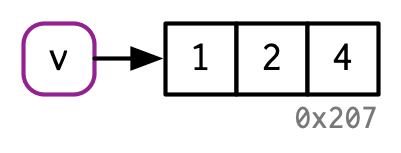#### An exception to copy-on-modify

If an object has a single name bound to it, R will modify it in place:

```v <- c(1, 2, 3)```

<img src="https://d33wubrfki0l68.cloudfront.net/496ac87edf04d7e235747c3cf4a4e66deca754f2/3ac04/diagrams/name-value/v-inplace-1.png" width="200">

```v[[3]] <- 4```

<img src="https://d33wubrfki0l68.cloudfront.net/a6ef7ab337f156cdb2c21816923368383bc2e858/1f8bb/diagrams/name-value/v-inplace-2.png" width="200">


- Hence, modify in place can be a useful optimization for speeding up code.
- However, there are some complications that make predicting exactly when R applies this optimisation challenging (see [here](https://adv-r.hadley.nz/names-values.html#modify-in-place) for details)
- There is one other time R will do this, we will cover this when we get to environments.

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

### Writing readable R code

- WriTing AND reading    (code) TaKes cognitive RESOURCES, & We only hAvE so MUCh! 

- To help free up cognitive capacity, we will follow the [tidyverse style guide](https://style.tidyverse.org/index.html)

<img src="img/tidyverse-hex.png" width=200>

#### Sample code **not** in tidyverse style

Can we spot what's wrong?

```
library(tidyverse)
us.2015.econ=read_csv( "data/state_property_data.csv")
us.2016.vote=read_csv( "data/2016_presidential_election_state_vote.csv")
stateData=left_join (us.2015.econ,us.2016.vote) %>%
    filter(party!="Not Applicable") %>%
    mutate(meanCommuteHours=mean_commute_minutes/60)
ggplot(stateData, aes (x=mean_commute_minutes, y=med_prop_val, color=party)) +
    geom_point()+
    xlab( "Income (USD)" )+
    ylab("Median property value (USD)")+
    scale_colour_manual (values = c("blue","red"))+
    scale_x_continuous (labels = scales::dollar_format())+
    scale_y_continuous (labels = scales::dollar_format())
```

#### Sample code in tidyverse style

```
library(tidyverse, quietly = TRUE)
us_2015_econ <- read_csv("data/state_property_data.csv")
us_2016_vote <- read_csv("data/2016_presidential_election_state_vote.csv")
state_data <- left_join(us_2015_econ, us_2016_vote) %>%
    filter(party != "Not Applicable") %>%
    mutate(mean_commute_hours = mean_commute_minutes / 60)
ggplot(state_data, aes(x = med_income, y = med_prop_val, color = party)) +
    geom_point() +
    xlab("Income (USD)") +
    ylab("Median property value (USD)") +
    scale_colour_manual(values = c("blue", "red")) +
    scale_x_continuous(labels = scales::dollar_format()) +
    scale_y_continuous(labels = scales::dollar_format())
```

### What did we learn today?

- How to get help in R
 
- How the ` <- ` differs from `=` in R

- Base R syntax for subsetting and modifying R objects

- Some aspects of tidyverse code style


## Additional resources:
- [RStudio base R cheat sheet](https://www.rstudio.com/wp-content/uploads/2016/10/r-cheat-sheet-3.pdf)
- [R Operators cheat sheet](https://cran.r-project.org/doc/contrib/Baggott-refcard-v2.pdf)

## Attribution:
- [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham
- [Why do we use arrow as an assignment operator?](https://colinfay.me/r-assignment/) by Colin Fay